In [0]:
from google.colab import drive
drive.mount ('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
data = pd.read_csv('gdrive/My Drive/Colab Notebooks/Position_Salaries.csv')

Description
The purpose of this project is to use data transformation and machine learning to create a model that will predict a salary when given years of experience, job type.

Data
The data for this model is fairly simplified as it has very few missing pieces. The raw data consists of a training dataset with the features listed above and their corresponding salaries.


Information Used To Predict Salaries
Years Experience: How many years of experience
Job Type: The position held (Business Analyst, Junior Consultunt,Senior Consultant....)
Position Level : Experience in years (1,2,3.....)

In [0]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [0]:
data.shape

(10, 3)

In [0]:
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


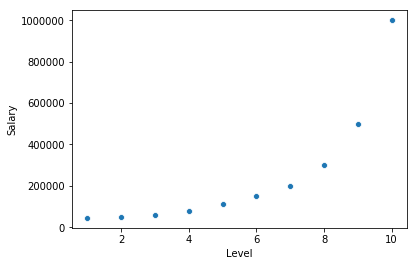

In [0]:
#scatter plot check the relationship between level and salary
sns.scatterplot(data['Level'],data['Salary'])

In [0]:
#correlation co-efficient to see the co-relation between level and salary
np.corrcoef(data['Level'],data['Salary'])[0,1]

0.8179494074776199

/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/links.py:190: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:889: RuntimeWarning: divide by zero encountered in true_divide
  endog_mu = self._clean(endog / mu)
/usr/local/lib/python3.6/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning: divide by zero encountered in true_divide
  n_endog_mu = self._clean((1. - endog) / (1. - mu))


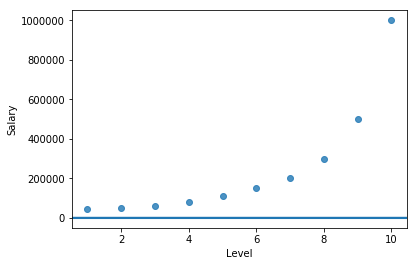

In [0]:
sns.regplot(x='Level',y='Salary',data=data,
           logistic=True,y_jitter=.06)

In [0]:
X = data[['Level']].values
y = data['Salary'].values

In [0]:
#importing linier regression classifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_pred = lin_reg.predict(X)
rmse = np.sqrt(mean_squared_error(y,y_pred))
rmse

163388.73519272613

In [0]:
#score of the model
r2_score(y,y_pred)

0.6690412331929895

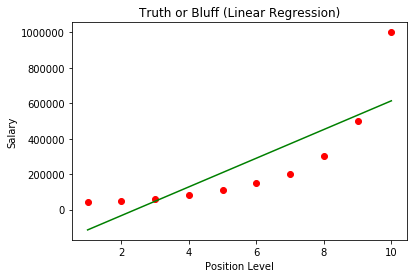

In [0]:
plt.scatter(X,y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'green')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [0]:
#linier model predictions
lin_reg.predict([[6.5]])

array([330378.78787879])

In [0]:
#importing polynomial regression classifier with polynomial degree = 2
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)
y_pred2 = lin_reg_2.predict(X_poly)
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [0]:
#root mean squared error
rmse = np.sqrt(mean_squared_error(y,y_pred2))
rmse

82212.12400451247

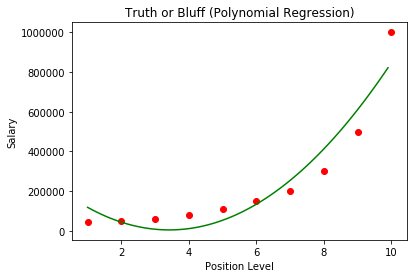

In [0]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'green')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [0]:
#polynomial model predictions
lin_reg_2.predict(poly_reg.fit_transform([[6]]))

array([134484.84848485])

In [0]:
#importing polynomial regression classifier with polynomial degree = 3
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)
y_pred2 = lin_reg_2.predict(X_poly)
X_poly

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

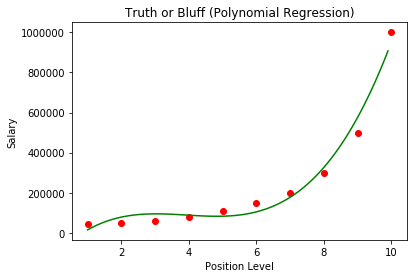

In [0]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'green')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [0]:
rmse = np.sqrt(mean_squared_error(y,y_pred2))
rmse

38931.50401232919

In [0]:
#importing polynomial regression classifier with polynomial degree = 4
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly,y)
y_pred2 = lin_reg_2.predict(X_poly)
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

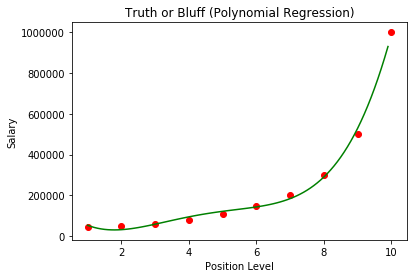

In [0]:
X_grid = np.arange(min(X),max(X),0.1)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'green')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

In [0]:
rmse = np.sqrt(mean_squared_error(y,y_pred2))
rmse

14503.234909626732

In [0]:
#prediction of salary with 6.5 years of experience.
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45265155])

# **LOGISTIC REGRESSION**

In [0]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [0]:
dataset = pd.read_csv('gdrive/My Drive/Colab Notebooks/titanic_train.csv')

In [0]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
dataset.shape

(891, 12)

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


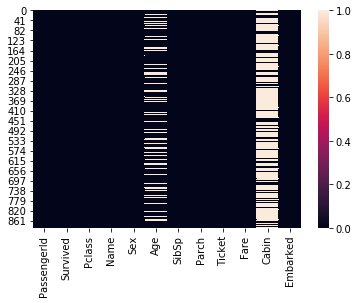

In [0]:
sns.heatmap(dataset.isnull())

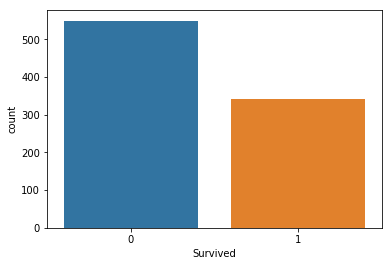

In [0]:
sns.countplot(x='Survived',data=dataset)

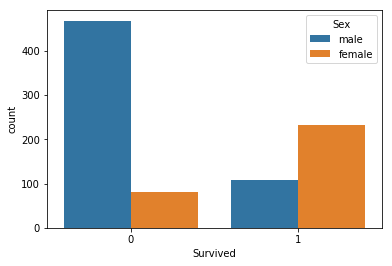

In [0]:
sns.countplot(x='Survived',data=dataset,hue="Sex")

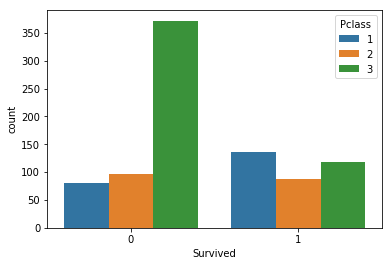

In [0]:
sns.countplot(x='Survived',data=dataset,hue="Pclass")

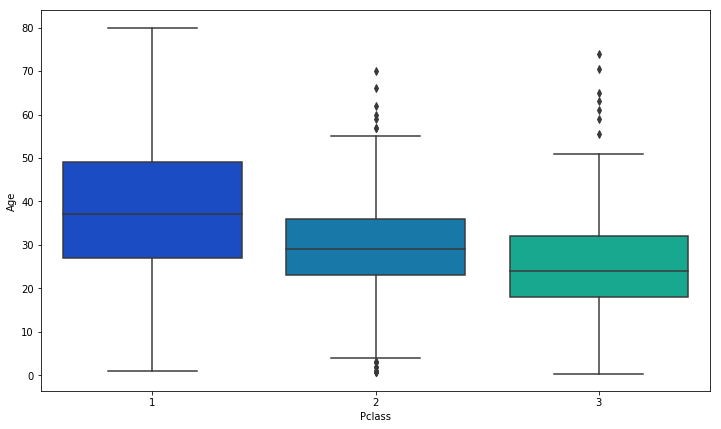

In [0]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=dataset,palette='winter')

In [0]:
def impute_age(cols):
  Age = cols[0]
  Pclass = cols[1]
  
  if pd.isnull(Age):
    if Pclass == 1:
      return 37
    elif Pclass ==2:
      return 29
    else:
      return 24
  else:
    return Age

In [0]:
dataset['Age']= dataset[['Age','Pclass']].apply(impute_age,axis=1)

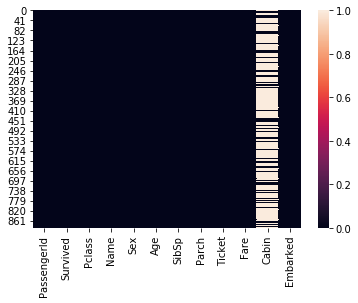

In [0]:
sns.heatmap(dataset.isnull())

In [0]:
dataset.drop('Cabin',axis =1,inplace=True)

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [0]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [0]:
sex = pd.get_dummies(dataset['Sex'],drop_first=True)
embark = pd.get_dummies(dataset['Embarked'],drop_first=True)

In [0]:
dataset.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [0]:
dataset = pd.concat([dataset,sex,embark],axis=1)

In [0]:
dataset.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(dataset.drop('Survived',axis =1),
                                                dataset['Survived'],test_size=0.20,random_state=101)
X_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,1,45.5,0,0,28.5000,1,0,1
700,1,18.0,1,0,227.5250,0,0,0
748,1,19.0,1,0,53.1000,1,0,1
751,3,6.0,0,1,12.4750,1,0,1
481,2,29.0,0,0,0.0000,1,0,1
845,3,42.0,0,0,7.5500,1,0,1
740,1,37.0,0,0,30.0000,1,0,1
287,3,22.0,0,0,7.8958,1,0,1
669,1,37.0,1,0,52.0000,0,0,1
241,3,24.0,1,0,15.5000,0,1,0


In [0]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
logmodel.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0])

In [0]:
logmodel.score(X_test,Y_test)

0.7988826815642458

In [0]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
331,1,45.5,0,0,28.500,1,0,1
700,1,18.0,1,0,227.525,0,0,0
748,1,19.0,1,0,53.100,1,0,1
751,3,6.0,0,1,12.475,1,0,1
481,2,29.0,0,0,0.000,1,0,1


In [0]:
logmodel.predict(X_test)[0:5]

array([0, 1, 0, 0, 0])

In [0]:
logmodel.predict_proba(X_test)[0:5]

array([[0.69029954, 0.30970046],
       [0.03539575, 0.96460425],
       [0.56386531, 0.43613469],
       [0.82159507, 0.17840493],
       [0.7904723 , 0.2095277 ]])

In [0]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.83      0.69      0.75        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
actual = Y_test
predicted = predictions
results = confusion_matrix(actual, predicted)
print('Confusion Matrix')
print(results)
print('Accuracy Score :', accuracy_score(actual, predicted))
print('Report')
print(classification_report(actual,predicted))

Confusion Matrix
[[88 11]
 [25 55]]
Accuracy Score : 0.7988826815642458
Report
              precision    recall  f1-score   support

           0       0.78      0.89      0.83        99
           1       0.83      0.69      0.75        80

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [0]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [0]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
  plt.plot([0,1], [0,1],color='darkblue',linestyle='--')
  plt.title('Receiver Operating Charactersticks (ROC) Curve')
  plt.xlabel('False Positive Value')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()

In [0]:
probs = logmodel.predict_proba(X_test)
probs

array([[0.69029954, 0.30970046],
       [0.03539575, 0.96460425],
       [0.56386531, 0.43613469],
       [0.82159507, 0.17840493],
       [0.7904723 , 0.2095277 ],
       [0.91949726, 0.08050274],
       [0.6384708 , 0.3615292 ],
       [0.87048712, 0.12951288],
       [0.16241   , 0.83759   ],
       [0.43318109, 0.56681891],
       [0.7904723 , 0.2095277 ],
       [0.89745812, 0.10254188],
       [0.36959076, 0.63040924],
       [0.87677597, 0.12322403],
       [0.84615006, 0.15384994],
       [0.9131964 , 0.0868036 ],
       [0.51963782, 0.48036218],
       [0.85433001, 0.14566999],
       [0.84845772, 0.15154228],
       [0.26212283, 0.73787717],
       [0.90446613, 0.09553387],
       [0.93900952, 0.06099048],
       [0.37362135, 0.62637865],
       [0.42156484, 0.57843516],
       [0.92822047, 0.07177953],
       [0.76768515, 0.23231485],
       [0.85062535, 0.14937465],
       [0.78014932, 0.21985068],
       [0.9042707 , 0.0957293 ],
       [0.9232067 , 0.0767933 ],
       [0.

In [0]:
probs = probs[:,1]
probs

array([0.30970046, 0.96460425, 0.43613469, 0.17840493, 0.2095277 ,
       0.08050274, 0.3615292 , 0.12951288, 0.83759   , 0.56681891,
       0.2095277 , 0.10254188, 0.63040924, 0.12322403, 0.15384994,
       0.0868036 , 0.48036218, 0.14566999, 0.15154228, 0.73787717,
       0.09553387, 0.06099048, 0.62637865, 0.57843516, 0.07177953,
       0.23231485, 0.14937465, 0.21985068, 0.0957293 , 0.0767933 ,
       0.76160835, 0.90329435, 0.6263947 , 0.12979735, 0.07959696,
       0.92019742, 0.10715249, 0.07687184, 0.08355483, 0.38503988,
       0.61385752, 0.56681891, 0.83346893, 0.2916968 , 0.17937069,
       0.3621628 , 0.06633033, 0.3102369 , 0.09320386, 0.2095277 ,
       0.75458944, 0.36177871, 0.72620351, 0.66873113, 0.6263947 ,
       0.1236    , 0.15323981, 0.1446231 , 0.29581192, 0.9136193 ,
       0.89252533, 0.15174398, 0.06440321, 0.59715964, 0.08230375,
       0.24520663, 0.76661058, 0.61862102, 0.58406038, 0.35638351,
       0.56020023, 0.14651165, 0.14323608, 0.13855228, 0.56621

In [0]:
auc = roc_auc_score(Y_test,probs)
print('AUC: %.2f' %auc)

AUC: 0.88


In [0]:
fpr, tpr, thresholds = roc_curve(Y_test, probs)

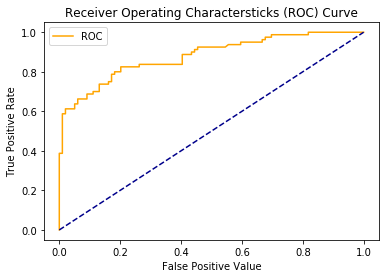

In [0]:
plot_roc_curve(fpr, tpr)